In [75]:
import pandas as pd
import pycaret
from pycaret import regression
import os
import pathlib
from sklearn.model_selection import train_test_split

In [85]:
header = ["data", "consumo-diario"]
i = 0
df = []
for arquivo in pathlib.Path("daily-2015").iterdir():
    df.append(pd.read_csv(str(arquivo), names = header))
    df[i].apply
    
    i += 1
for data in df[1:]:
    df[0] = df[0].append(data, ignore_index=True)
dados = df[0]
print(dados)

IndexError: list assignment index out of range

In [77]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41478 entries, 0 to 41477
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            41478 non-null  object 
 1   consumo-diario  41478 non-null  float64
dtypes: float64(1), object(1)
memory usage: 648.2+ KB


In [78]:
treino, teste = train_test_split(dados, test_size=0.2, random_state=42)

In [80]:
reg = regression.setup(data = treino, target = 'consumo-diario', train_size = 0.7)

,Description,Value
0,session_id,8467
1,Target,consumo-diario
2,Original Data,"(33182, 2)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(23227, 21)"


In [81]:
regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,11.6625,277.0660,16.6350,0.5687,0.7486,19.6937,0.0190
xgboost,Extreme Gradient Boosting,11.6625,277.0659,16.6350,0.5687,0.7486,19.6937,0.4130
et,Extra Trees Regressor,11.6625,277.0660,16.6350,0.5687,0.7486,19.6937,0.3350
catboost,CatBoost Regressor,11.6625,277.0636,16.6349,0.5687,0.7486,19.6940,4.0090
lightgbm,Light Gradient Boosting Machine,11.6621,277.0484,16.6345,0.5687,0.7486,19.6950,0.0430
rf,Random Forest Regressor,11.6634,277.0656,16.6350,0.5687,0.7486,19.6762,0.3070
gbr,Gradient Boosting Regressor,11.7495,279.3946,16.7046,0.5651,0.7566,19.7489,0.1650
lr,Linear Regression,11.9268,286.4460,16.9147,0.5541,0.7546,19.7784,0.2430
ridge,Ridge Regression,11.9287,286.4244,16.9140,0.5541,0.7546,19.7390,0.0210
lar,Least Angle Regression,11.9284,286.4247,16.9141,0.5541,0.7545,19.7412,0.0160


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=8467, splitter='best')

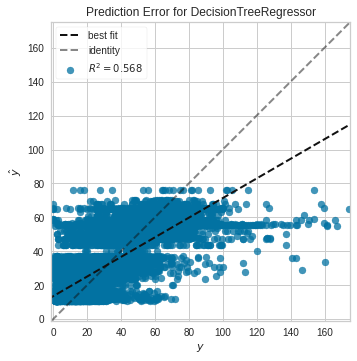

In [84]:
model = regression.create_model("dt")
regression.plot_model(model, plot='error')